# Molecular Dynamics Asignment: Barrier Crossing In 1D
Authors: _Stefan Hervø-Hansen_<sup>🐺</sup>, _Vidar Aspelin_<sup>🦡</sup>, and _Samuel Stenberg_<sup>🦄</sup>.  
Division of Theoretical Chemistry, Lund University. 

Electronic Address:  
🐺 stefan.hervo_hansen@teokem.lu.se  
🦡 vidar.aspelin@teokem.lu.se  
🦄 samuel.stenberg@teokem.lu.se

<figure>
    <img src="include/black_swan.png" width=280 />
</figure>
<center>How does the title and asignment relate to the picture? The answer will be more aparent by the end of the asignment.</center>

## Intended learning outcomes
1. The effects on the time step on the total energy fluctuations
2. Transformation of energy (potential vs kinetic energy)
3. Concept of phase space and available microstates in different ensembles
4. Sampling differences between MD and MC

## Theory and Questions for Reflection
Consider the movement of a single particle that moves on a 1D potential energy surface with the following functional form:
$$
U(x)=
\begin{cases}
\epsilon B x^2, & \text{if}\ x \leq 0.0\\
\epsilon x_{\circ}^2 \left[ 1 - \cos \left( \frac{2\pi x}{x_\circ} \right)\right], & \text{if}\ 0.0 \leq x \leq 1.0\\
\epsilon B (x_{\circ}-x)^2, & \text{if}\ x \geq 1.0
\end{cases}
\tag{eq. 1}
$$
The energy, force and the derivative of the force should be continuous functions of the position $x$ with $\epsilon$ > 0 and $x_\circ$ is a standard position set to 1 for units to cancel, here $x_\circ=1 \ \mathrm{nm}$. We want to investigate this system using Molecular dynamics.

**Question 1: Briefly explain Molecular dynamics (include the concepts Newton's equations of motion, trajectory, integrator, time step, NVE ensemble, energy)**  
____________
_Answer 1: Molecular dynamics seeks to solve Newton's equations of motions, sampling velocity and position with propagation of the values though time. By numerically integrate, using a specific time step, the equations of motion from an arbitrary initial condition yielding a trajectory of constant energy, due to Newtonian dynamics conserving energy thus sampling the microcaonical (NVE) ensemble. Other ensembles, in particular NVT and NPT can be simulated through the addition of thermostats and barostats._
____________


In order to propagate positions and velocities in time, we need information about the acceleration, which is obtained from the forces. To make sure that our system is stable and can be propagated correctly, we need to make the potential, the force, and the derivative of the force (with respect to x) continuous. EDIT: Maybe connect to an example, e.g. square well potential and add a figure or possibly animation! Change the potential to a asymmetric double well. 

**Question 2: Derive an expression for _B_ so that the potential, force and derivative of the force becomes continuous and plot/sketch the energy landscape.**  
____________
_Answer 2: The force is given by negative derivative of the potential energy with respect to position $F = \frac{\partial U}{\partial r}$, thus the force and derivative of the force is given by:_
$$
F(x)=
\begin{cases}
- 2 \epsilon  Bx, & \text{if}\ x \leq 0.0\\
- 2 \pi \epsilon x_\circ \sin \left( \frac{2\pi x}{x_\circ} \right), & \text{if}\ 0.0 \leq x \leq 1.0\\
- 2 \epsilon B (x_{\circ}-x), & \text{if}\ x \geq 1.0
\end{cases}
\tag{eq. 2}
$$
_and_
$$
\nabla F(x)=
\begin{cases}
- 2 \epsilon  B, & \text{if}\ x \leq 0.0\\
- 4 \pi^2 \epsilon \cos \left( \frac{2\pi x}{x_\circ} \right), & \text{if}\ 0.0 \leq x \leq 1.0\\
- 2 \epsilon  B, & \text{if}\ x \geq 1.0
\end{cases}
\tag{eq. 3}
$$
_For the two functions to be differential the functions must yield the same value in their overlapping limits i.e. when $x=0$ and $x=1$, we thus calculate the value of B, using the derivative of the force such that the statement is true:_
$$
\begin{split}
- 2 \epsilon  B &= - 4 \pi^2 \epsilon \cos \left( \frac{2\pi \times 0}{x_\circ} \right)
\Leftrightarrow B = 2 \pi^2 \cos(0) =  2 \pi^2 \\
- 2 \epsilon  B &= - 4 \pi^2 \epsilon \cos \left( \frac{2\pi \times 1}{x_\circ} \right)
\Leftrightarrow B = 2 \pi^2 \cos(2\pi) =  2 \pi^2
\end{split}
\tag{eq. 4}
$$
_Thus the energy landscape assembles a double well potential with the energy going towards $\infty$ for $x\rightarrow-\infty$ and $x\rightarrow\infty$._
____________

Below a program is provided that integrates the equation of motion of the particle on the potential energy surface, starting at the position 0 ($x(t=0)=0$), using either molecular dynamics and methods thereof (case 1-3) or Monte Carlo simulation (case 4). The program functionalities has been listed below:  
<ul style="list-style-type:none;">
  <li>Case 1: Molecular dynamics, NVE ensemble</li>
  <li>Case 2: Molecular dynamics with Andersen thermostat</li>
  <li>Case 3: Molecular dynamics with Berendsen thermostat</li>
  <li>Case 4: Monte Carlo </li>
</ul>  
In case 2 and 3, we are approximating the NVT ensemble using two different thermostats, in particular the Andersen thermostat and Berendsen thermostat which can be categorized as a stochastic method and velocity rescale method respectively.


_Before conducting simulations, review the code and try to understand what is happening. In this lab exercise, we will only be using the Andersen thermostat to simulate the_ NVT _ensemble._

**Question 3: Conduct short simulations of the NVE ensemble using different time steps and comment on the differences in energy profiles (potential, kinetic and total energy). Elaborate on the differences you observe!**
____________
_Answer 3: By conducting simulations in the NVE ensemble, the initial configuration will determine the total energy within the system for the simulation, while the potential energy and kinetic energy can be freely transformed into each other so long the total energy remains conserved. This is directly observed in the molecular dynamics simulation with the potential increasing as the kinetic energy decreases. While the total energy is to remain constant, it can be noted the energy instead tends to oscillate with increasing time step increasing the magnitude of the oscillations. We can explain this due to 1. the approximation in updating positions and velocities correctly due to the usage of a finite time step in the numerical integration and 2. the numerical error arising from the computer, related to precision of the position, velocities, forces etc._
____________


Newton's equations tell us that if we have a set of particle positions and particle velocities at an arbitrary time, it is possible to predict the positions and velocities at any one particular instant in time. Therefore, classical dynamics of a $N$-particle system can be expressed by specifying the full set of 6$N$ variables ($2N$ for each dimension). The $6N$ variables can be regarded as a single point in a $6N$-dimensional space named the _phase space_. The phase space is a Cartesian space and solving Newton's equations yields a trajectory in phase space. Consequently, classical motion can be described by the motion of a point along a trajectory in phase space, with each point in phase space representing a possible microstate. 

To be able to visualize phase space, we will in the following plot the phase space for 1 particle in 1 dimension bla bla bla .... Also add figure of pendulum 

**Question 4: What do you expect the phase space trajectories for the 1 particle to look like in terms of density and shape for the following situations, given a (i) Harmonic potential and (ii) the potential given in Eq. 1? _Hint_: The first term in Eq. 1 is a harmonic oscillator. EDIT: How would the shape of phase space change if we added more energy to the NVE emseble?**
1. *NVE* ensemble.
2. *NVT* ensemble.  
____________
_Answer 4: For a harmonic potential the phase space for the single particle will be a circle, with the circle being hollow and the radius of the circle being related to the total energy in the initial configuration for the NVE ensemble, while the circle will be filled in the case of the NVT ensemble with the density of points becoming more diluted as one moves away from the origin._
_For the double well potential we expect to see 2 circles with the density following the same principles as before: for NVE we expect a single line of constant energy which will assemble that of an infinity sign, while for NVT we expect the configurations of low energy to have high density of points._
____________

EDIT: add short text about configurational space as compared to phase space.

**Question 5: Using the simulations methods (case: 1,2,4) for low temperatures (150 < T < 300 K), comment on the following:**
1. Does the result correspond with what you expected in terms of the density and shape? Comment on any differences. 
2. Why does the phase space (EDIT: configurational space) distribution of the MC scheme look so much different compared to the MD schemes at low temperatures?
3. Why does the phase space distribution for the *NVE* and *NVT* ensemble look so different?
4. Show that the MD data obtained using the Andersen thermostat matches the analytical probability distribution for velocities and positions for the harmonic oscillator. Use the code provided below. EDIT: add gaussian identity equation on general form.
____________
_Answer 5:_  
_1. One should note that at low temperature the molecular dynamics code will sample the single harmonic potential at all times for the NVE scheme, and for short simulations in the NVT scheme using the Andersen thermostat, while the Monte Carlo simulations generate a phase for the double harmonic potential._   
_2. Monte Carlo simulations samples configurations by stochastic displacements of the particle position and thus samples low energy configurations due to the Metropolis algorithm, thus depending on the displacement parameter it is simply a matter of time before the particle will cross the barrier. In the case of molecular dynamics the positions are obtained from time-dependent displacements, and despite the Andersen thermostat being stochastic, there is still less chance to cross the barrier to the having assigned a velocity fast enough to cross the barrier._  
_3. The phase space distribution within NVE is the sampling of a constant energy surface, while in NVT the energies are now distributed according to the Boltzmann distribution with low energy states being more probable than high energy states. Finally there is the practical difference between molecular dynamics to have the dimension of momentum/velocity in addition to position, whereas Monte Carlo simulation only possess information about position._  
_4. We need to derive the probability of sampling specific positions and velocities for the harmonic potential. The molecular partition function for the Hamiltonian having the kinetic term and harmonic potential term yields_:
$$
Z = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{-\beta \left(\frac{1}{2}m v^2 + \epsilon B x^2 \right)} \mathrm{d}v \ \mathrm{d}x = \int_{-\infty}^{\infty} e^{-\beta \frac{1}{2}m v^2} \mathrm{d}v \int_{-\infty}^{\infty} e^{-\beta \epsilon B x^2} \ \mathrm{d}x
\tag{eq. 5}
$$  
_Note that the expression the most left has the potential energy and kinetic energy term seperated. Using the gaussian integration identity $\int_{-\infty}^{\infty} e^{-a(x+b)^2} \mathrm{d}x = \sqrt{\frac{\pi}{a}}$ we find the partition function(s) to:_
$$
Z = \sqrt{\frac{\pi}{\beta \frac{1}{2}m}} \sqrt{\frac{\pi}{\beta \epsilon B}} = \underbrace{\sqrt{\frac{2 \pi k_{B} T}{m}}}_{\text{Kinetic part}} \underbrace{\sqrt{\frac{\pi k_{B} T}{\epsilon B}}}_{\text{Configurational part}}
\tag{eq. 6}
$$
_The probability of velocities and positions are then given from the Boltzmann distribution using the kinetic and configurational partition function respectively:_
$$
P = \frac{e^{-\beta \epsilon}}{Z}
\tag{eq. 7}
$$
_One should arrive at low temperature the analytical solution fits the simulation, however at higher temperatures the potential becomes less harmonic (even before crossing the barrier!) which causes the analytical solution to fit the simulation less._
____________


**Question 6: Make a prediction at which temperature half the particles would be able to cross the energy barrier and test your hypothesis using Molecular dynamics. Comment on the result and compare with the mean speed of the Maxwell-Boltzmann distribution at the predicted temperature. EDIT: remove this question? Instead: put more emphasis on the sampling difference between MD and MC (they should eventually sample the same thing..)**  

Overall edits: add more comments, restructure code in classes, maybe students can call on functions to execute verlet integration or similar. Code cells below each question so it becomes more smooth. 


In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import brewer2mpl
bmap = brewer2mpl.get_map('Set2','qualitative',8,reverse=True)
colors = bmap.mpl_colors
import random

In [2]:
# SIMULATION SETTINGS
eps = 15.0                                        # [kJ/(mol*nm**2)]
x_start = 0                                       # [nm]
Tstep = 0.01                                      # [ps]
Temperature = 300                                 # [K]
kB = 0.00831446                                   # [Dalton*nm**2 /(K*ps**2) = kJ/(mol*K)]
m = 1                                             # [Dalton]
Nstep = 5000
MU = 10                                           # [1/ps]
Coupling = Tstep                                  # [ps]
dp = 2.0                                          # [nm]
Nparticles = 100                                  # Number of independent particles

case = 1                                    # 1: NVE, 2: NVT (Andersen), 3: NVT (Berendsen), 4: NVT (Monte Carlo)

# LISTS FOR DATA COLLECTION
Data_pos  = np.empty(shape=(Nstep,Nparticles))
Data_vel  = np.empty(shape=(Nstep,Nparticles))
Data_time = np.empty(shape=Nstep)
Data_step = np.empty(shape=Nstep)
Data_Epot = np.empty(shape=(Nstep,Nparticles))
Data_Ekin = np.empty(shape=(Nstep,Nparticles))
Data_Etot = np.empty(shape=(Nstep,Nparticles))
Data_Temp = np.empty(shape=Nstep)

In [3]:
# FUNCTIONS FOR THE MOLECULAR DYNAMICS PROGRAM
def Potential(x):
    '''Function returning energy and force depending on the position, x, on the 1D energy surface.'''
    if x <= 0.0:
        U = eps *  2.0 * np.pi**2 * x**2
        F = eps * -4.0 * np.pi**2 * x
    elif x >= 1.0:
        U = eps * 2.0 * np.pi**2 * (x-1.0)**2
        F = eps * -4.0 * np.pi**2 * (x-1.0)
    else:
        U = eps * (1.0 - np.cos(2*np.pi*x))
        F = eps * -2.0 * np.pi * np.sin(2.0*np.pi*x)
    return U, F      
        
def VelocityVerlet_NVE(Position, Velocity, Force):
    '''Velocity Verlet algorithm using half step with no thermostat (NVE).'''
    Velocity += 0.5*Tstep*Force/m                 # [nm/ps]
    Position += Tstep*Velocity                    # [nm]
    U, F = Potential(Position)                    # [kJ/mol], [kJ/(nm*mol)]=[Dalton*nm/ps**2]
    Velocity += 0.5*Tstep*F/m                     # [nm/ps]
    
    return Position, Velocity, U, F

def Thermostat_And(Velocity):
    '''Andersen thermostat (NVT).'''
    for particle in range(Nparticles):
        # Check for stochastic collision
        if MU * Tstep > np.random.uniform(0,1):
            Velocity[particle] = RandomVelocity(Temperature,m)  # [nm/ps]
        
    return Velocity

def Thermostat_Ber(Velocity):
    ''''Berendsen thermostat (NVT).'''
    TInstant = m/kB*np.mean(Velocity**2)   # [K]
    Lambda = np.sqrt(1+Tstep/Coupling*((Temperature/TInstant)-1))
    Velocity *= Lambda    # [nm/ps]
    return Velocity

def MonteCarlo(Position, Accept):
    '''Monte Carlo simulation (NVT).'''
    Uold, Fold = Potential(Position)
    Position_new = Position + (np.random.uniform(0.0, 1.0) - 0.5) * dp 
    Unew, Fnew = Potential(Position_new)
    
    # Metropolis Criteria
    if np.exp(-(Unew-Uold)/(kB*Temperature)) >= np.random.uniform(0.0, 1.0):
        Position = Position_new
        Uold = Unew
        Accept+=1.0
    
    return Position, Uold, Accept

def RandomVelocity(Temperature, m):
    '''Random velocity asignment from the Maxwell-Boltzmann distribution.'''
    return np.sqrt(kB*Temperature/m) * np.random.normal(0,1,1)

def SampleData(Position, Velocity, i):
    '''Collection of data after each MD/MC itteration.'''
    Data_pos[i] = Position                          # [nm]
    Data_vel[i] = Velocity                          # [nm/ps]
    Data_time[i] = i*Tstep                          # [ps]
    Data_step[i] = i                                # Unitless
    Data_Epot[i] = U                                # [kJ/mol]
    Data_Ekin[i] = 0.5*m*Velocity**2                # [kJ/mol]
    Data_Etot[i] = U+0.5*m*Velocity**2              # [kJ/mol]
    Data_Temp[i] = m/kB*np.mean(Velocity**2)        # [K]

In [4]:
# MAIN MD PROGRAM
Position = np.zeros(Nparticles)
Velocity = np.zeros(Nparticles)
Force    = np.zeros(Nparticles)
U        = np.zeros(Nparticles)

for i in range(Nstep): # System loop
    for j in range(Nparticles): # Particle loop
        if i == 0:
            Position[j] = x_start
            U[j], Force[j] = Potential(Position[j])
            if case != 4:
                Velocity[j] = RandomVelocity(Temperature,m)
            if case == 4:
                Velocity[j] = 0
                Accept = 0
        
        if case != 4:
            # NVE integration
            Position[j], Velocity[j], U[j], Force[j] = VelocityVerlet_NVE(Position[j], Velocity[j], Force[j])
        
        else:
            # MC simulation Nparticle times
            k = np.random.randint(0,Nparticles,1)
            Position[k], U[k], Accept = MonteCarlo(Position[k], Accept)
    if i == Nstep-1 and case == 4:
        print(r'Acceptance ratio: {}%'.format((Accept)/(Nstep*Nparticles)*100))
   
    # Thermostating
    if case == 2:
        Velocity = Thermostat_And(Velocity)
    elif case == 3:
        Velocity = Thermostat_Ber(Velocity) 
    
    # Sample data
    SampleData(Position, Velocity, i)  

### Data visualization

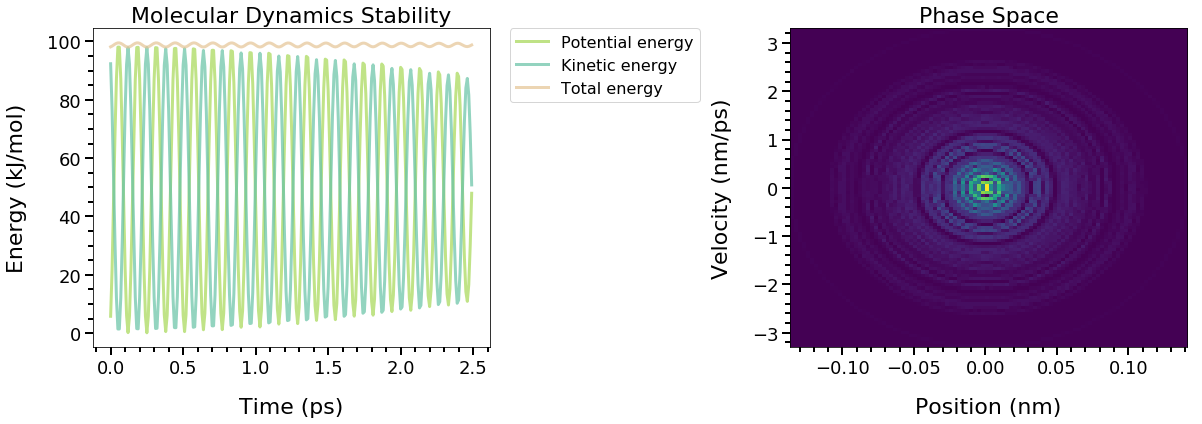

In [5]:
fig = plt.figure(figsize=(2*8.4,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

if case != 4:
    ax1.plot(Data_time[:250], np.sum(Data_Epot[:250], axis=1), color=colors[3], label=r'Potential energy', lw=3, alpha=0.7)
    ax1.plot(Data_time[:250], np.sum(Data_Ekin[:250], axis=1), color=colors[7], label=r'Kinetic energy', lw=3, alpha=0.7)
    ax1.plot(Data_time[:250], np.sum(Data_Etot[:250], axis=1), color=colors[1], label=r'Total energy', lw=3, alpha=0.7)
else:
    ax1.plot(Data_step[:250], Data_Epot[:250], color=colors[3], label=r'Potential energy', lw=3, alpha=0.7)

if case == 4:
    ax2.hist(Data_pos, density=True, bins=100)
else:
    ax2.hist2d(Data_pos.ravel(), Data_vel.ravel(), normed=True, bins=100)



# Graphics settings
for i,ax in enumerate([ax1, ax2]):
    ax.minorticks_on()
    ax.tick_params(axis='both',which='minor',length=5,width=2,labelsize=18)
    ax.tick_params(axis='both',which='major',length=8,width=2,labelsize=18)
    if i == 0:
        ax.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        if case == 4:
            ax.set_title(r'Monte Carlo Stability', fontsize=22)
            ax.set_xlabel(r'Step', fontsize=22, labelpad=20)
        else:
            ax.set_title(r'Molecular Dynamics Stability', fontsize=22)
            ax.set_xlabel(r'Time (ps)', fontsize=22, labelpad=20)
        ax.set_ylabel(r'Energy (kJ/mol)', fontsize=22, labelpad=20)
    elif i == 1:
        if case == 4:
            ax.set_title(r'Conformational Space',fontsize=22)
            ax.set_ylabel(r'Probability', fontsize=22, labelpad=20)
        else:
            ax.set_title(r'Phase Space', fontsize=22)
            ax.set_ylabel(r'Velocity (nm/ps)', fontsize=22, labelpad=20)
        ax.set_xlabel(r'Position (nm)', fontsize=22, labelpad=20)

plt.tight_layout()
plt.show()

In [6]:
particle_id = np.arange(0, Nparticles, 1)
particle_id = np.stack((particle_id, [False]*Nparticles), axis=-1)
Tcounter = 0

for particle in range(Nparticles):
    for position in Data_pos.T[particle]:
        if position > 0.5:
            particle_id[particle][1] = True
            break
            
for particle in particle_id:
    if particle[1] == True:
        Tcounter += 1

print('{}% of the particles crossed the barrier at T = {} K'.format(Tcounter/Nparticles*100, Temperature))

0.0% of the particles crossed the barrier at T = 300 K


### Program your self

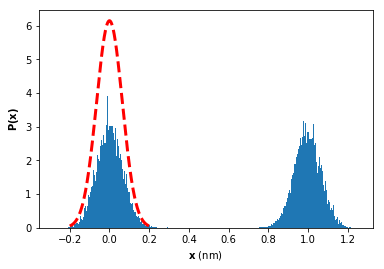

The area under the curve is equal to: 1.00


In [14]:
################################################
#                QUESTION 5.3                  #
# Boltzman distribution: Potential energy part #
################################################

plt.hist(Data_pos.ravel(), density=True, bins=1000)

# FINISH THE CODE: START
partition_function_PE = np.sqrt(np.pi/(2*(np.pi**2)*eps/(kB*Temperature))) 

def probability_PE(m, Temperature, x):
    return np.exp(-eps*2.0*np.pi**2 * x**2 /(kB*Temperature) )/ partition_function_PE

# FINISH THE CODE: END

x = np.arange(-0.2, 0.2, 0.0001)
plt.plot(x, probability_PE(m, Temperature, x), 'r--', linewidth=3)
plt.xlabel(r'$\bf{x}\ \mathrm{(nm)}$')
plt.ylabel(r'$\bf{P(x)}$')
plt.show()

# Self-Check: The sum of all probabilities should always equal 1!
print('The area under the curve is equal to: {:03.2f}'.format(np.trapz(probability_PE(m,Temperature,x), x)))

In [ ]:
##############################################
#                QUESTION 5.3                #
# Boltzman distribution: Kinetic energy part #
##############################################
plt.hist(Data_vel.ravel(), density=True, bins=100)

# FINISH THE CODE: START
partition_function_KE = np.sqrt(2*np.pi/(m/(kB*Temperature)))

def probability_KE(m, Temperature, v):
    return np.exp(-0.5*m*v**2/(kB*Temperature)) / partition_function_KE

# FINISH THE CODE: END

v = np.arange(-5, 5, 0.001)
plt.plot(v, probability_KE(m, Temperature, v), 'r--', linewidth=3)
plt.xlabel(r'$\bf{v}\ \mathrm{(nm/ps)}$')
plt.ylabel(r'$\bf{P(v)}$')
plt.show()

# Self-Check: Should always equal 1!
print('The area under the curve is equal to: {:3.2f}'.format(np.trapz(probability_KE(m,Temperature,v), v)))

In [ ]:
##############################################
#                QUESTION 6                  #
#         Prediction of temperature          #
##############################################

T_list = np.arange(300,50000,100)
v_bot = np.arange(0, 10000, 0.1)
v_top = np.arange(np.sqrt(4*eps/m), 10000, 0.1)
frac_list = []

def integrand(Temperature, v):
    return np.exp(-0.5*m*v**2/(kB*Temperature))

for T in T_list:
    top = np.trapz(integrand(T,v_top), v_top)
    bot = np.trapz(integrand(T,v_bot), v_bot)
    frac = top/bot
    if (abs(frac-0.5))<0.0008:
        print(r'The temperature at which half the particles can cross the barrier is {}'.format(T))
    frac_list.append(frac)
    
# CHANGE HERE TOO!
plt.plot(T_list, frac_list)

plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Fraction of particles")
plt.show()